## Symmetric Payouts

연간 $n$개의 IID 베팅을 생성하는 전략을 고려해 보자. 여기서 베팅 $i \in [1,n]$의 결과 $X_i$로부터의 이익은 $\pi > 0$인데 확률은 $P[X_i = \pi]=p$이다. 손실은 $-\pi$인데 확률은 $P[X_i=-\pi]=1-p$이다. $p$는 이진 분류기의 정밀도로 생각할 수 있는데, 양수는 기회에 베팅하는 것을 의미하고, 음수는 기회를 무시하는 것을 의미한다. True positive는 보상을 받을 것이고, False Positive는 손실을 입을 것이며, Negative는 수익이 없다. 베팅의 결과 $\{X_i\}_{i=1, \dots, n}$은 독립적이므로, 베팅 별 기대 모멘트를 계산할 수 있다. 하나의 베팅으로부터의 기대 수익은 $E[X_i]=\pi p+(-\pi)(1-p)=\pi(2p-1)$이다. 분산은 $V[X_i]=E[X_i^2]-E[X_i]^2$이며, 여기서 $E[X_i^2]=\pi^2p+(-\pi)^2(1-p)=\pi^2$이므로 $V[X_i]=\pi^2-\pi^2(2p-1)^2=\pi^2[1-(2p-1)^2]=4\pi^2p(1-p)$이다. 연간 $n$개의 IID 베팅에 관한 Annualized Sharpe Ratio $\text{SR}(\theta)$는 다음과 같다.

$$\theta[p,n] = \frac{nE[X_i]}{\sqrt{nV[X_i]}} = \frac{2p-1}{2\sqrt{p(1-p)}}\sqrt{n}$$

Payout이 대칭이므로 $\pi$가 앞 식에서 어떻게 상쇄되었는지 주목하자. Gaussian Distribution의 경우처럼 $\theta[p,n]$도 크기가 재조정된 $t$값으로 이해할 수 있다. $p > \frac{1}{2}$인 작은 경우에도 충분히 큰 $n$값에서 $\text{SR}$가 커질 수 있음을 보여준다. 이는 $p$가 겨우 0.5를 넘어서는 고빈도 거래에 경제적인 근거를 제공하고, 성공의 열쇠는 $n$을 증가시키는 데 있다. $\text{SR}$은 정확도가 아니라 정밀도의 함수이다. 기회를 무시하면 보상이 없거나 즉시 손실을 볼 것이기 때문이다.

예를 들어, $p=0.55$이고, $\frac{2p-1}{2\sqrt{p(1-p)}}=0$에 대해 연환산 2의 Sharpe Ratio를 얻으려면 연 396번의 베팅이 필요하다. 아래의 코드는 이 결과를 실험적으로 증명한다.

In [2]:
import numpy as np
from tqdm import tqdm

out = []
p = 0.55

for i in tqdm(range(1_000_000)) :
    rnd = np.random.binomial(n=1, p=p)
    x = (1 if rnd == 1 else -1)
    out.append(x)

100%|██████████| 1000000/1000000 [00:00<00:00, 1878326.07it/s]


In [8]:
print(f'mean: {np.mean(out)*100:.2f}%')
print(f'std: {np.std(out)*100:.2f}%')
print(f'sharpe ratio: {np.mean(out)/np.std(out):.2f}')

mean: 9.89%
std: 99.51%
sharpe ratio: 0.10


아래의 그림은 다양한 베팅 주기에 대해 Sharpe Ratio를 정밀도의 함수로 그리고 있다.

In [10]:
import matplotlib.pyplot as plt

def sharpe_ratio(p, n):
    return (2*p - 1) / (2 * np.sqrt(p * (1 - p))) * np.sqrt(n)

p_values = np.linspace(0.4, 0.6, 100)
n_values = [0, 25, 50, 75, 100] 

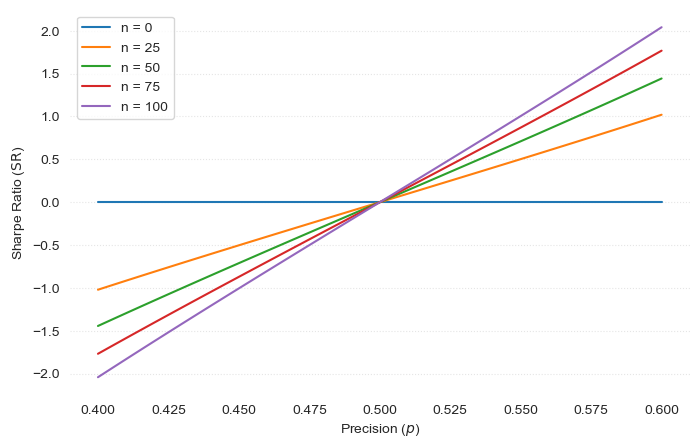

In [15]:
fig, ax = plt.subplots(figsize = (8, 5))

for n in n_values:
    sr_values = sharpe_ratio(p_values, n)
    ax.plot(p_values, sr_values, label=f'n = {n}')

for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls = ':', alpha = 0.5) 
plt.xlabel(r"Precision ($p$)")
plt.ylabel(r"Sharpe Ratio ($\text{SR}$)")
plt.legend()
plt.show()

$0 \leq p \leq 1$에 대해 풀어 보면 다음과 같은 $-4p^2+4p-\frac{n}{\theta^2+n}=0$을 얻게 된다.

$$p=\frac{1}{2} \left( 1 = \sqrt{1 - \frac{n}{\theta^2 + n}}\right)$$

이 식은 주어진 $\text{SR}(\theta)$에 대한 정밀도와 빈도 사이의 명시적 trade off 관계를 형성한다. 예를 들어, 오로지 주 단위 베팅(n=52)만 생성하는 전략은 연환산 2의 Sharpe Ratio를 얻고자 상당히 높은 정밀도의 $p=0.6336$이 요구된다.